<a href="https://colab.research.google.com/github/Newtella3105/JSC270_HW2_2022_mcecilia/blob/main/JSC270_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries you'll likely need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

###Importing data

In [2]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

In [3]:
income94.info()
income94.head()

# Yes, they are the expected data types based on the given descriptions, the continuous data are represented by integers and others by objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
income94 = income94.replace(' ?', np.nan)
income94.info()
income94.isna().sum()

# Yes, there are missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           30725 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          30718 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      31978 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

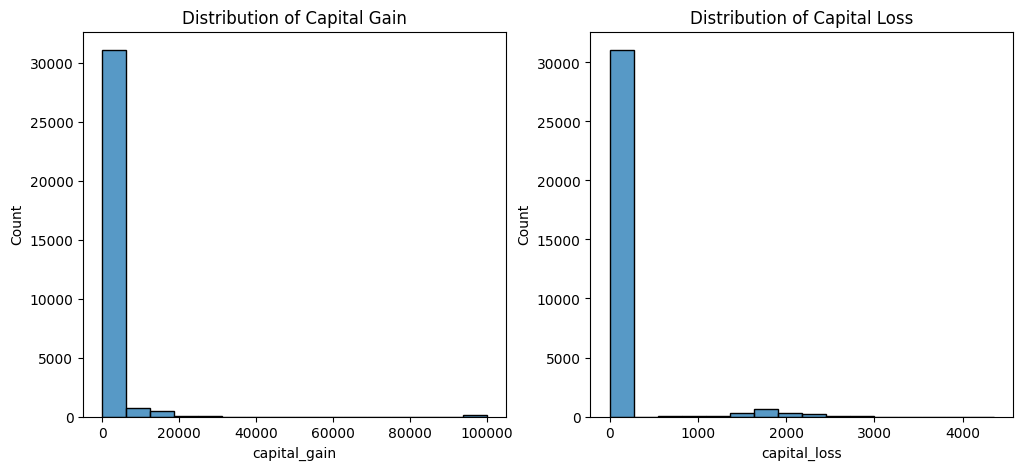

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot distribution of capital_gain
sns.histplot(income94['capital_gain'], ax=axes[0])
axes[0].set_title('Distribution of Capital Gain')

# Plot distribution of capital_loss
sns.histplot(income94['capital_loss'], ax=axes[1])
axes[1].set_title('Distribution of Capital Loss')

plt.show()

# No, I don't think these variables should be transformed to categorical variables, since most of the data are clustered on the lower ends, making categories would make it so that the count of the categories on the lower end would be extremely high.

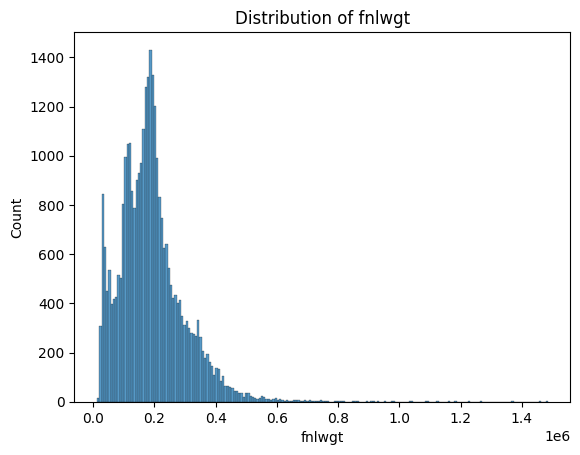

In [6]:
ax = sns.histplot(income94['fnlwgt'])
ax.set_title('Distribution of fnlwgt')

plt.show()

# No, the variable is not symmetrically distributed.

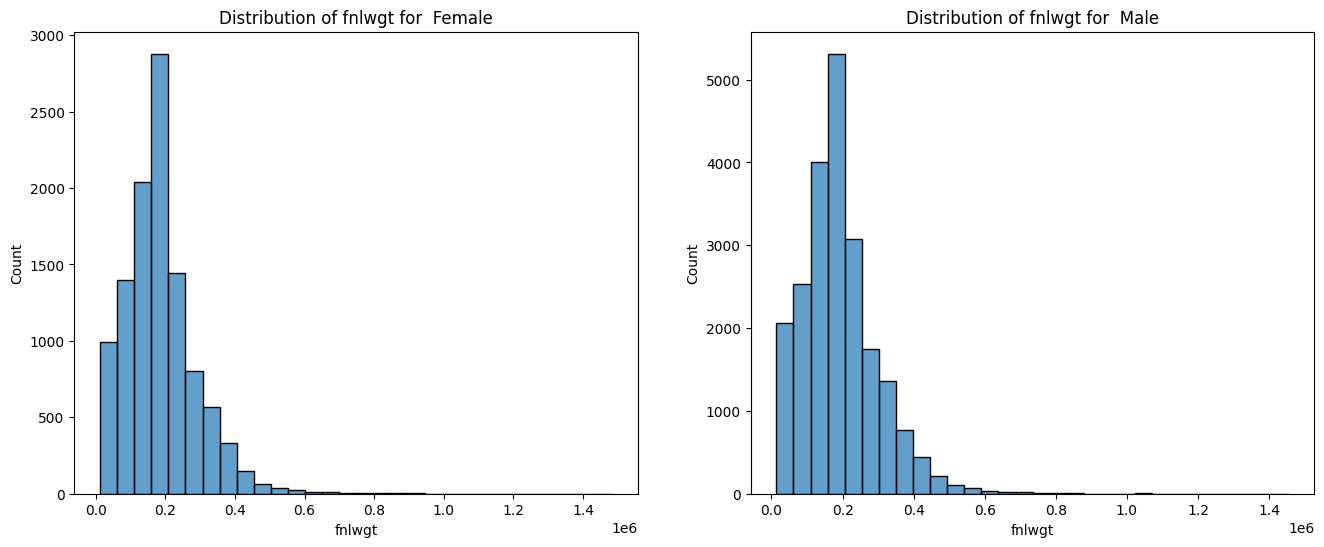

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i, (sex, group) in enumerate(income94.groupby('sex')):
    sns.histplot(data=group['fnlwgt'], bins=30, label=sex, alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Distribution of fnlwgt for {sex}')

plt.show()

# No, outliers should not be excluded since this may be cause it to be misleading, since the outliers are the people with very high fnlwgt.

In [8]:
selected_columns = ['age', 'education_num', 'hours_per_week']
selected_data = income94[selected_columns]

correlation_matrix = selected_data.corr()
print(correlation_matrix)

                     age  education_num  hours_per_week
age             1.000000       0.036527        0.068756
education_num   0.036527       1.000000        0.148123
hours_per_week  0.068756       0.148123        1.000000


In [9]:
selected_columns = ['age', 'education_num', 'hours_per_week', 'sex']
selected_data = income94[selected_columns]

# Calculate correlation matrix
correlation_matrix = selected_data.corr(numeric_only=True)

# Hypothesis testing for correlation coefficients
alpha = 0.05
seen_pairs = set()

for col1 in selected_columns[:-1]:
  for col2 in selected_columns[:-1]:
    if col1 != col2 and (col1, col2) not in seen_pairs and (col2, col1) not in seen_pairs:
      corr_coef, p_value = stats.pearsonr(selected_data[col1], selected_data[col2])
      print(f"{col1} vs {col2}: correlation = {corr_coef:.4f}, p-value = {p_value:.4f}")

      if np.abs(corr_coef) > 0.1 and p_value < alpha:
        print(f"The correlation between {col1} and {col2} is statistically significant.\n")
      elif np.abs(corr_coef) <= 0.1:
        print(f"The correlation between {col1} and {col2} is less than 0.1.\n")
      else:
        print(f"The correlation between {col1} and {col2} is not statistically significant.\n")

      seen_pairs.add((col1, col2))

# Yes, education_num and hours_per_week appear to be correlated since the correlation coefficient of 0.15 is more than 0.1 and it has a p-value less than an alpha value of 0.05.
# The direction and significance of the finding is expected since the coefficient is positive, indicating that more education implies more hours per week and it is statistically significant.

age vs education_num: correlation = 0.0365, p-value = 0.0000
The correlation between age and education_num is less than 0.1.

age vs hours_per_week: correlation = 0.0688, p-value = 0.0000
The correlation between age and hours_per_week is less than 0.1.

education_num vs hours_per_week: correlation = 0.1481, p-value = 0.0000
The correlation between education_num and hours_per_week is statistically significant.



In [10]:
selected_columns = ['age', 'education_num', 'sex']
selected_data = income94[selected_columns]

# Separate data by gender
male_data = selected_data[selected_data['sex'] == ' Male']
female_data = selected_data[selected_data['sex'] == ' Female']

# Calculate correlation coefficients and p-values for each gender
corr_coef_male, p_value_male = stats.pearsonr(male_data['education_num'], male_data['age'])
corr_coef_female, p_value_female = stats.pearsonr(female_data['education_num'], female_data['age'])

# Print the results
print(f"Correlation between education_num and age for Male: {corr_coef_male:.4f}, p-value: {p_value_male:.4f}")
print(f"Correlation between education_num and age for Female: {corr_coef_female:.4f}, p-value: {p_value_female:.4f}")

# The correlation coefficient is positive in males, but negative in females which is not expected.
# However, the p-value for females is more than 0.05, which means there isn't sufficient evidence against the null hypothesis for the case of females.

Correlation between education_num and age for Male: 0.0605, p-value: 0.0000
Correlation between education_num and age for Female: -0.0179, p-value: 0.0632


In [11]:
# Select the relevant columns
selected_columns = ['education_num', 'hours_per_week']
selected_data = income94[selected_columns]

# Calculate the covariance matrix
covariance_matrix = selected_data.cov()

# Print the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)

# The variance of education_num is 6.61 and the variance of hours_per_week is 152.46.
# There is a positive covariance of 4.71 between education_num and horus_per_week which indicates that individuals with a higehr education tend to work more hours per week on average.

Covariance Matrix:
                education_num  hours_per_week
education_num        6.618890        4.705338
hours_per_week       4.705338      152.458995


In [12]:
# Select the relevant columns
selected_columns = ['hours_per_week', 'sex', 'education_num', 'gross_income_group']
selected_data = income94[selected_columns]

# Model 1: hours_per_week ~ sex
reg1 = smf.ols('hours_per_week ~ sex', data=selected_data).fit()
print("Model 1 Summary:")
print(reg1.summary())

# Model 2: hours_per_week ~ sex + education_num
reg2 = smf.ols('hours_per_week ~ sex + education_num', data=selected_data).fit()
print("\nModel 2 Summary:")
print(reg2.summary())

# Model 3: hours_per_week ~ sex + education_num + gross_income_group
reg3 = smf.ols('hours_per_week ~ sex + education_num + gross_income_group', data=selected_data).fit()
print("\nModel 3 Summary:")
print(reg3.summary())

# Model 1 suggests that yes, men do tend to work more hours.

# After adding education_num, the trend in horus worked by men vs women remains the same.
# The coefficient for education_num is statistically significant since the p-value is below 0.05.
# The 95% confidence interval for education_num is [0.647, 0.748].

# The R-squared value can be used to determine the "best" model. Since the R-squared value increases from model 1 to 3, we can deduce that model 1 is the "worst", while model 3 is the "best".

Model 1 Summary:
                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Sat, 17 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:28:45   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4104      0.

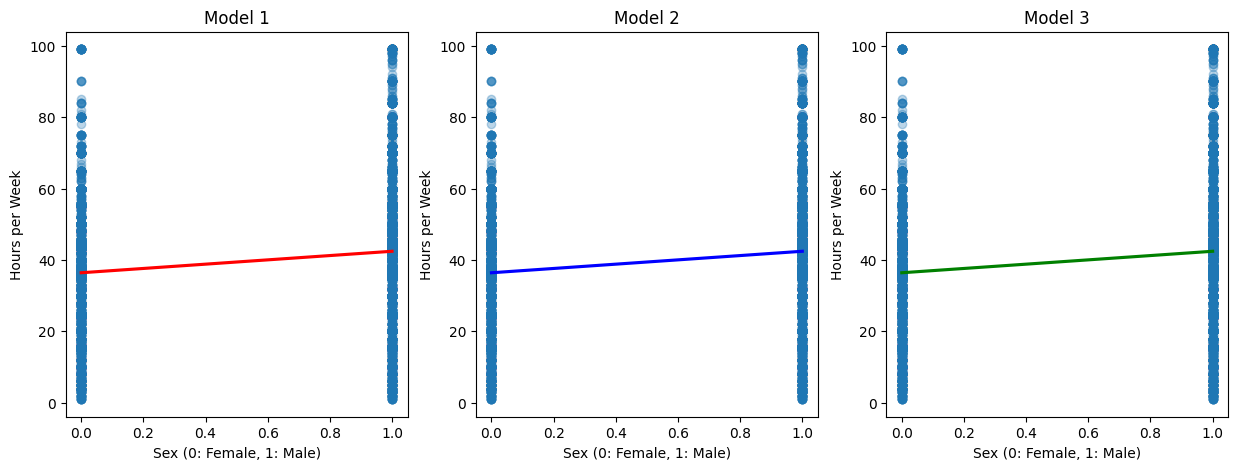

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the fit of Model 1
sns.regplot(y=reg1.model.endog, x=reg1.model.exog[:, 1], data=selected_data, scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=axes[0])
axes[0].set_title('Model 1')
axes[0].set_xlabel('Sex (0: Female, 1: Male)')
axes[0].set_ylabel('Hours per Week')

# Plot the fit of Model 2
sns.regplot(y=reg2.model.endog, x=reg2.model.exog[:, 1], data=selected_data, scatter_kws={'alpha':0.3}, line_kws={'color':'blue'}, ax=axes[1])
axes[1].set_title('Model 2')
axes[1].set_xlabel('Sex (0: Female, 1: Male)')
axes[1].set_ylabel('Hours per Week')

# Plot the fit of Model 3
sns.regplot(y=reg3.model.endog, x=reg3.model.exog[:, 1], data=selected_data, scatter_kws={'alpha':0.3}, line_kws={'color':'green'}, ax=axes[2])
axes[2].set_title('Model 3')
axes[2].set_xlabel('Sex (0: Female, 1: Male)')
axes[2].set_ylabel('Hours per Week')

plt.show()